# Доверительные интервалы для доли 

## Генерация данных

In [1]:
import numpy as np

In [2]:
np.random.seed(1)

statistical_population = np.random.randint(2, size = 100000) 

random_sample = np.random.choice(statistical_population, size = 1000)

In [3]:
#истинное значение доли
statistical_population.mean()

0.49771

## Точечная оценка доли

In [4]:
random_sample.mean()

0.502

## Доверительный интервал для доли

In [6]:
from statsmodels.stats.proportion import proportion_confint

### Доверительный интервал на основе нормального распределения

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [7]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [8]:
print ('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.471010, 0.532990] with width 0.061979


### Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [9]:
wilson_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'wilson')

In [11]:
print ('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.471062, 0.532922] with width 0.061860


## Размер выборки для интервала заданной ширины

In [10]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [11]:
n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 0.01)))
n_samples

9604

In [12]:
np.random.seed(1)
random_sample = np.random.choice(statistical_population, size = n_samples)

In [13]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [14]:
print 'normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0])

normal_interval [0.481776, 0.501773] with width 0.019997


In [20]:
proportion_confint(1, 50, method = 'wilson')

(0.003539259271646236, 0.10495443589637815)

In [16]:
import scipy
z = scipy.stats.norm.ppf(0.975)

In [19]:
p = 1/50
p - z * (p*(1-p)/50)**0.5

-0.018805307081790974

In [21]:
p*(1-p)/(0.01/z)**2

752.9259288560484

In [24]:
p = np.arange(0, 1, 0.01)

In [26]:
n = p*(1-p)/(0.01/z)**2

In [27]:
n

array([   0.        ,  380.30442325,  752.92592886, 1117.86451682,
       1475.12018715, 1824.69293983, 2166.58277487, 2500.78969227,
       2827.31369203, 3146.15477415, 3457.31293862, 3760.78818546,
       4056.58051465, 4344.68992621, 4625.11642012, 4897.85999639,
       5162.92065501, 5420.298396  , 5669.99321934, 5912.00512505,
       6146.33411311, 6372.98018353, 6591.94333631, 6803.22357145,
       7006.82088895, 7202.7352888 , 7390.96677102, 7571.51533559,
       7744.38098252, 7909.56371181, 8067.06352346, 8216.88041746,
       8359.01439383, 8493.46545255, 8620.23359364, 8739.31881708,
       8850.72112288, 8954.44051104, 9050.47698156, 9138.83053443,
       9219.50116967, 9292.48888726, 9357.79368721, 9415.41556952,
       9465.35453419, 9507.61058122, 9542.1837106 , 9569.07392235,
       9588.28121645, 9599.80559291, 9603.64705174, 9599.80559291,
       9588.28121645, 9569.07392235, 9542.1837106 , 9507.61058122,
       9465.35453419, 9415.41556952, 9357.79368721, 9292.48888

In [28]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/varvara/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random_sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


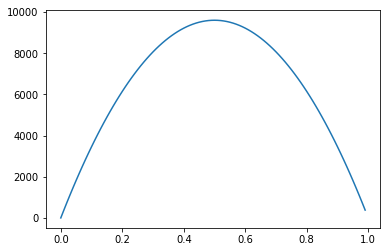

In [30]:
plt.plot(p, n)

In [31]:
0.5*(1-0.5)/(0.01/z)**2

9603.647051735312

In [32]:
from statsmodels.stats.proportion import samplesize_confint_proportion
from math import ceil
ceil(samplesize_confint_proportion(1.0/50, 0.01, method='normal'))


753

In [33]:
from statsmodels.stats.proportion import samplesize_confint_proportion
from math import ceil
ceil(samplesize_confint_proportion(0.5, 0.01, method='normal'))


9604